In [98]:
# Imports
import json
from pandas.io.json import json_normalize
import requests
import pyspark as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from textwrap import wrap
import folium
import plotly.graph_objects as go
import scipy as sp
import scipy.stats as stats


In [5]:
# Methods
def unpack_column(dataFrame,col_name):
    newDf = dataFrame.from_records(dataFrame[col_name].dropna().tolist())
    return newDf

def unpack_and_destroy(dataFrame,column):
    temp = unpack_column(dataFrame,column)
    for col in temp.columns:
        dataFrame[col] = temp[col]
    #dataFrame = dataFrame.drop(columns=[column])
    return dataFrame

def sort_db_value(db,value,asc=False):
    return db.sort_values(by = value, ascending = asc)

def freq_array(freq_list):
    freq = []
    for i in freq_list:
        freq.append(i)
    return freq

def set_labels(freq, ax,horz_shift=.2,vert_shift=1000,w="bold",fsize=10,c="b"):
    for i, v in enumerate(freq):
        ax.text(i-horz_shift,v+vert_shift, str(round(v,2)), weight = w,fontsize=fsize,color = c)
        
def wrap_axis_labels(labels_list,wrap_length=13):
    labels_list = [ '\n'.join(wrap(l, wrap_length)) for l in labels_list]
    return labels_list

In [6]:
region1_df = pd.read_csv('Data/eo1.csv')
region2_df = pd.read_csv('Data/eo2.csv')
region3_df = pd.read_csv('Data/eo3.csv')

In [7]:
all_regions_df = pd.concat([region1_df,region2_df,region3_df])

In [8]:
all_regions_df.shape

(1711634, 28)

In [9]:
all_regions_df = all_regions_df[all_regions_df["DEDUCTIBILITY"] == 1]
all_regions_df.shape

(1418907, 28)

In [10]:
# all_regions_df = all_regions_df.drop(\
#     columns=['FILING_REQ_CD',"PF_FILING_REQ_CD","STATUS","NTEE_CD"])

In [11]:
# # State Count Bar Graph
# state_df_count = all_regions_df.groupby("STATE").size()
# states = list(state_df_count.index.values)
# freq = freq_array(state_df_count)

# fig,ax = plt.subplots(figsize = (40,20))
# ax.bar(states,freq, color = "b");
# ax.set_yticks(np.arange(0,np.max(state_df_count)+10000,10000));
# ax.set_title("Number of Organizations by State", weight = "bold", fontsize = 40);
# ax.set_xlabel("State", fontsize=30, weight = "bold");
# ax.set_ylabel("Frequency", fontsize=30, weight = "bold");

# set_labels(state_df_count,ax,.4,1500,c="k");

In [12]:
# state_df_count = all_regions_df.groupby("STATE").size().reset_index(name="Frequency").sort_values(by="Frequency",ascending=False)
# state_df_count.iloc[:10]

In [13]:
# # State Count Bar Graph (Top 10)
# state_df_count = all_regions_df.groupby("STATE").size().reset_index(name="Frequency").sort_values(by="Frequency",ascending=False)
# state_df_count = state_df_count.iloc[:10]

# states = state_df_count['STATE']
# freq = freq_array(state_df_count['Frequency'])
# fig,ax = plt.subplots(figsize = (20,10))
# ax.bar(states,freq, color = "b");

# ax.set_yticks(np.arange(0,np.max(freq)+20000,20000));
# ax.set_title("Number of Organizations by State (Top 10)", weight = "bold", fontsize = 30);
# ax.set_xlabel("State", fontsize=25, weight = "bold");
# ax.set_ylabel("Frequency", fontsize=25, weight = "bold");
# ax.set_yticklabels(np.arange(0,np.max(freq)+20000,20000), weight="bold", fontsize =20) ;
# ax.set_xticklabels(states, weight="bold",fontsize=20);

# set_labels(freq,ax,.3,1500,c="k",fsize=20);

# plt.savefig("Num_Orgs_Top_10_States")

In [14]:
# my_USA_map = "Data/us-states.json"
# map = folium.Map(location=[40, -100], zoom_start=4)

In [15]:
# state_df = all_regions_df.groupby("STATE").size().reset_index(name="Count")

In [16]:
# map.choropleth(geo_data=my_USA_map, data=state_df,
#              columns=['STATE', 'Count'],
#              key_on='feature.id',
#              fill_color='YlGn', fill_opacity=0.8, line_opacity=0.2,
#              legend_name='Charity Count', hover_text=state_df["STATE"])
# map

In [17]:
## Adding in Population Data
# pop_data = pd.read_csv('Data/acs2017_census_tract_data.csv')
# pop_data = pop_data.groupby("State")["TotalPop"].sum().reset_index(name="Population")
# pop_abbrv = pd.read_csv('Data/states.csv')
# pop_df = pd.merge(pop_data, pop_abbrv, on='State')
# pop_df["STATE"] = pop_df["Abbreviation"]
# pop_df = pop_df.drop(columns=["Abbreviation"])

In [18]:
# income_df = all_regions_df.groupby("STATE")["INCOME_AMT"].sum().reset_index(name="Sum_Income")

In [19]:
# add_pop = pd.merge(pop_df, income_df, on = "STATE")
# add_pop["Income_Per_Capita"] = add_pop["Sum_Income"] / add_pop["Population"]

In [21]:
# # Dropping District of Colombia
# add_pop = add_pop.drop(add_pop.index[8])
#Dropping Deleware
# add_pop = add_pop.drop(add_pop.index[7])
# add_pop.head(5)

In [22]:
# # state_df = add_pop.groupby("STATE")["INCOME_AMT"].sum().reset_index(name="Sum")
# fig = go.Figure(data=go.Choropleth(
#     locations = add_pop['STATE'],
#     z=add_pop['Income_Per_Capita'],
#     locationmode='USA-states',
#     colorscale='Blues',
#     autocolorscale=False,
#     text=add_pop['STATE'], # hover text
#     marker_line_color='black', # line markers between states
#     colorbar_title="Income Per Capita"
# ))

# fig.update_layout(
#     title_text='Charity Income Per Capita by State - IRS<br>(Hover for breakdown)',
#     geo = dict(
#         scope='usa',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

# fig.show()

In [23]:
# # State Per Capita Bar Graph
# state_df_count = add_pop.groupby("STATE")['Income_Per_Capita'].sum()
# state_df_count = state_df_count.sort_values(ascending=False).iloc[:10]

# states = list(state_df_count.index.values)
# freq = freq_array(state_df_count)

# fig,ax = plt.subplots(figsize = (20,10))
# ax.bar(states,freq, color = "b");

# ax.set_yticks(np.arange(0,np.max(freq)+20000,20000));
# ax.set_title("Charity Income Per Capita by State (Top 10)", weight = "bold", fontsize = 30);
# ax.set_xlabel("State", fontsize=25, weight = "bold");
# ax.set_ylabel("Income Per Capita ($)", fontsize=25, weight = "bold");
# ax.set_yticklabels(np.arange(0,np.max(freq)+20000,20000), weight="bold", fontsize =20) ;
# ax.set_xticklabels(states, weight="bold",fontsize=20);

# set_labels(freq,ax,.4,1500,c="k",fsize=17);

# plt.savefig("Inc_Per_Cap_Orgs_Top_10_States")

In [24]:
# all_regions_df.sort_values(by="INCOME_AMT",ascending=False).head()

In [25]:
# total_assets = all_regions_df.groupby("STATE")["ASSET_AMT"].agg("sum").reset_index(name="Sum")
# total_assets.head()

In [26]:
# fig = go.Figure(data=go.Choropleth(
#     locations = total_assets['STATE'],
#     z=total_assets['Sum'],
#     locationmode='USA-states',
#     colorscale='Reds',
#     autocolorscale=False,
#     text=total_assets['STATE'], # hover text
#     marker_line_color='black', # line markers between states
#     colorbar_title="Sum of Assets"
# ))

# fig.update_layout(
#     title_text='Sum of US Charitable Organizations Assets by State<br>(Hover for breakdown)',
#     geo = dict(
#         scope='usa',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

# fig.show()

In [27]:
# def heatmap_USA_by_state(dataFrame,state_col_name,zoom_col_name,title,bar_title,action="sum"):
#     temp_df = dataFrame.groupby(state_col_name)[zoom_col_name].agg(action).reset_index(name=action)
    
#     fig = go.Figure(data=go.Choropleth(
#     locations = temp_df[state_col_name],
#     z=temp_df[action],
#     locationmode='USA-states',
#     colorscale='Reds',
#     autocolorscale=False,

#     text = temp_df[state_col_name],

#     marker_line_color='black', # line markers between states
#     colorbar_title=bar_title
#     ))

#     fig.update_layout(
#         title_text=title+'<br>(Hover for breakdown)',
#         geo = dict(
#             scope='usa',
#             projection=go.layout.geo.Projection(type = 'albers usa'),
#             showlakes=True, # lakes
#             lakecolor='rgb(255, 255, 255)'),
#     )

#     fig.show()


In [28]:
# fig = go.Figure(data=go.Choropleth(
#     locations = add_pop['STATE'],
#     z=add_pop['Income_Per_Capita'],
#     locationmxode='USA-states',
#     colorscale='Blues',
#     autocolorscale=False,
#     text=add_pop['STATE'], # hover text
#     marker_line_color='black', # line markers between states
#     colorbar_title="Income Per Capita"
# ))

# fig.update_layout(
#     title_text='Charity Income Per Capita by State - IRS<br>(Hover for breakdown)',
#     geo = dict(
#         scope='usa',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

# fig.show()

In [29]:
# ## GDP Per Capita DataFrame
# gdp_df = pd.read_csv('Data/bea-gdp-by-state.csv')
# gdp_df_2017 = gdp_df[['Area','2017']]
# gdp_df_2017 = gdp_df_2017.drop(gdp_df_2017.index[0])
# gdp_df_2017["State"] = gdp_df_2017["Area"]

In [30]:
# ## Merge GDP Per Capita
# pop_abbrv = pd.read_csv('Data/states.csv')
# GDP_pop_df = pd.merge(gdp_df_2017, pop_abbrv, on='State')
# GDP_pop_df["STATE"] = GDP_pop_df["Abbreviation"]
# GDP_pop_df = GDP_pop_df.drop(columns=["Abbreviation"])

In [31]:
# ## GDP Per Capita DataFrame
# gdp_df = pd.read_csv('Data/bea-gdp-by-state.csv')
# gdp_df_2017 = gdp_df[['Area','2017']]
# gdp_df_2017 = gdp_df_2017.drop(gdp_df_2017.index[0])
# gdp_df_2017["State"] = gdp_df_2017["Area"]

In [32]:
# ## Merge GDP Per Capita
# pop_abbrv = pd.read_csv('Data/states.csv')
# GDP_pop_df = pd.merge(gdp_df_2017, pop_abbrv, on='State')
# GDP_pop_df["STATE"] = GDP_pop_df["Abbreviation"]
# GDP_pop_df = GDP_pop_df.drop(columns=["Abbreviation"])

In [33]:
# GDP_pop_df = pd.merge(GDP_pop_df, pop_df, on = "STATE")

In [34]:
# GDP_pop_df['GDP'] = GDP_pop_df["2017"] * GDP_pop_df['Population']

In [35]:
# GDP_pop_df.head()

In [36]:
# ##Merge GDP Per Capita with Income
# income_df = all_regions_df.groupby("STATE")["INCOME_AMT"].sum().reset_index(name="Sum_Income")
# GDP_Income_df = pd.merge(GDP_pop_df, income_df, on = "STATE")

In [37]:
# ## Adding New Columns of Interest
# GDP_Income_df["Income_Per_State_GDP"] = round((GDP_Income_df['Sum_Income'] / GDP_Income_df['GDP']),2)

In [38]:
# fig = go.Figure(data=go.Choropleth(
#     locations = GDP_Income_df['STATE'],
#     z=GDP_Income_df['Income_Per_State_GDP'],
#     locationmode='USA-states',
#     colorscale='Blues',
#     autocolorscale=False,
#     text=GDP_Income_df['STATE'], # hover text
#     marker_line_color='black', # line markers between states
#     colorbar_title="Income / State GDP"
# ))

# fig.update_layout(
#     title_text='Charity Income / State GDP - IRS<br>(Hover for breakdown)',
#     geo = dict(
#         scope='usa',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

# fig.show()

In [39]:
# # State Per Capita Bar Graph
# state_df_count = GDP_Income_df.groupby("STATE")['Income_Per_State_GDP'].sum()
# state_df_count = state_df_count.sort_values(ascending=False).iloc[:10]

# states = list(state_df_count.index.values)
# freq = freq_array(state_df_count)

# fig,ax = plt.subplots(figsize = (20,10))
# ax.bar(states,freq, color = "b");

# ax.set_yticks(np.arange(0,1.01,1));
# ax.set_title("Charity Income / State GDP (Top 10)", weight = "bold", fontsize = 30);
# ax.set_xlabel("State", fontsize=25, weight = "bold");
# ax.set_ylabel("Charity Income / State GDP ", fontsize=25, weight = "bold");
# ax.set_yticklabels(np.arange(0,1.01,1), weight="bold", fontsize =20) ;
# ax.set_xticklabels(states, weight="bold",fontsize=20);

# set_labels(freq,ax,.2,.01,c="k",fsize=17);

# plt.savefig("Inc_Per_Cap_Orgs_Top_10_States")

In [40]:
# GDP_Income_df.head()

In [41]:
# GDP_pop_df.head()

In [42]:
# ##Merge GDP Per Capita with Income
# income_df = all_regions_df.groupby("STATE")["INCOME_AMT"].sum().reset_index(name="Sum_Income")
# GDP_Income_df = pd.merge(GDP_pop_df, income_df, on = "STATE")

In [43]:
# ## Adding New Columns of Interest
# GDP_Income_df["Income_Per_GDP"] = round((GDP_Income_df['Sum_Income'] / GDP_Income_df['2017']),2)

In [44]:
# GDP_Income_df.head()

In [45]:
# #Consider Adding Charity Names in Hover
# heatmap_USA_by_state(
#     all_regions_df,'STATE',"INCOME_AMT","Max Income Charities By State","Max Income","max"
# )

# Hypothesis 1: Comparing Regions

In [46]:
region1_df.head()


,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,3514
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN


In [47]:
region2_df.head()


,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,2120849,ANCILLA DOMINI SISTERS INC,NaN,LOCAL,DONALDSON,IN,46513-0000,928,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
1,10036381,DISABLED AMERICAN VETERANS,% BILLIENITA CARDONA,15623 S CENTERLINE RD,RUDYARD,MI,49780-9349,557,4,9,...,0,0,2,0,6,0.0,0.0,0.0,NaN,93 STRAITS
2,10060379,HEALING AND DELIVERANCE MINISTRY INC,NaN,14103 BYRNE PARK DR,CLARKSBURG,MD,20871-6337,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN
3,10123106,MORNING STAR BAPTIST CHURCH,NaN,3204 BROTHERS PL SE,WASHINGTON,DC,20032-1501,1961,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
4,10158948,SIGMA KAPPA SORORITY,% NATIONAL HEADQUARTERS,695 PRO-MED LN STE 300,CARMEL,IN,46032-5331,594,7,6,...,8,7,1,0,5,10360714.0,6808224.0,4862977.0,NaN,NaN


In [110]:
region3_df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,RULING,DEDUCTIBILITY,FOUNDATION,ACTIVITY,ORGANIZATION,STATUS,TAX_PERIOD,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,260049,CORINTH BAPTIST CHURCH,NaN,PO BOX 92,HOSFORD,FL,32334-0092,2024,3,9,7200,196908,1,10,59029000,5,1,NaN,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
1,360268,IGLESIA VICTORIA,NaN,1445 N BOONVILLE AVE,SPRINGFIELD,MO,65802-1894,1678,3,9,7000,196408,1,10,1002029,5,1,NaN,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,490336,EASTSIDE BAPTIST CHURCH,NaN,PO BOX 296,LABELLE,FL,33975-0296,2024,3,9,7200,196908,1,10,59029000,5,1,NaN,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
3,2296179,RELIGIOUS SCIENCE CHURCH CENTER OF SAN DIEGO,NaN,4102 MARLBOROUGH,SAN DIEGO,CA,92105-1462,0,3,3,7000,196204,1,10,1000000,1,1,NaN,0,0,6,0,3,NaN,NaN,NaN,NaN,NaN
4,3140260,PILGRIM BAPTIST CHURCH,NaN,31123 MISSION BLVD STE 205,HAYWARD,CA,94544-7617,3125,3,9,7000,195504,1,10,1000000,5,1,NaN,0,0,6,0,12,NaN,NaN,NaN,NaN,1910


In [49]:
region1_df["INCOME_AMT"].sum()

902730096889.0

In [50]:
region2_df["INCOME_AMT"].sum()

1671086284814.0

In [51]:
region3_df["INCOME_AMT"].sum()

1648126520802.0

In [52]:
region1_northeast_list = ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "NJ", "PA"]
region2_midwest_list = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
region3_south_list = ["TX", "OK", "AR", "LA", "MS", "AL", "FL", "GA", "SC", "NC", "VA", "TN", "KY", "WV", "DC", "MD", "DE"]
region4_west_list = ["MT", "ID", "WY", "CO", "NM", "AZ", "UT", "NV", "CA", "OR", "WA", "AK", "HI"]

In [109]:
all_regions_df_3 = all_regions_df[all_regions_df["SUBSECTION"]== 3]
all_regions_df_3.shape

(1332831, 28)

In [91]:
region1_northeast_df = all_regions_df_3[all_regions_df_3["STATE"].isin(region1_northeast_list)]
region2_midwest_df = all_regions_df_3[all_regions_df_3["STATE"].isin(region2_midwest_list)]
region3_south_df = all_regions_df_3[all_regions_df_3["STATE"].isin(region3_south_list)]
region4_west_df = all_regions_df_3[all_regions_df_3["STATE"].isin(region4_west_list)]

In [92]:
region1_charity_incomes = region1_northeast_df["INCOME_AMT"]
region2_charity_incomes = region2_midwest_df["INCOME_AMT"]
region3_charity_incomes = region3_south_df["INCOME_AMT"]
region4_charity_incomes = region4_west_df["INCOME_AMT"]

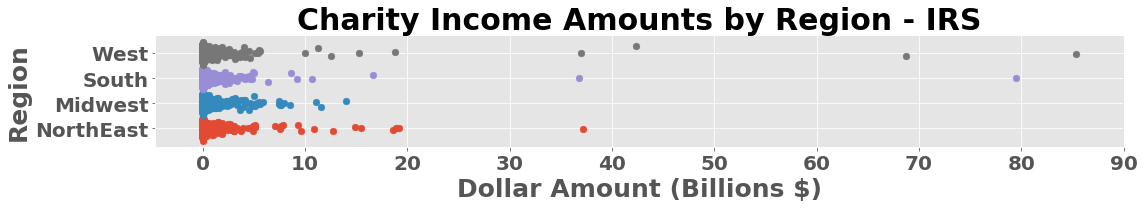

In [94]:

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(region1_charity_incomes, np.repeat(0, len(region1_charity_incomes)) + np.random.normal(0, 0.1, len(region1_charity_incomes)), s=45)
ax.scatter(region2_charity_incomes, np.repeat(1, len(region2_charity_incomes)) + np.random.normal(0, 0.1, len(region2_charity_incomes)), s=45)
ax.scatter(region3_charity_incomes, np.repeat(2, len(region3_charity_incomes)) + np.random.normal(0, 0.1, len(region3_charity_incomes)), s=45)
ax.scatter(region4_charity_incomes, np.repeat(3, len(region4_charity_incomes)) + np.random.normal(0, 0.1, len(region4_charity_incomes)), s=45)

ax.set_xticks(np.arange(0,np.max(region4_charity_incomes+10000000000), 10000000000))
ax.set_xticklabels(np.arange(0,100,10),fontsize = 20, weight = "bold")
ax.set_xlabel("Dollar Amount (Billions $)", fontsize = 25, weight = "bold")

ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(["NorthEast", "Midwest", "South", "West"], fontsize = 20, weight = "bold") ;
ax.set_ylabel("Region", fontsize = 25, weight = "bold")

ax.set_title("Charity Income Amounts by Region - IRS", fontsize = 30, weight = "bold");

plt.tight_layout()
plt.savefig("Charity_Income_AMTs_Regional_2")

In [108]:
res = stats.mannwhitneyu(region1_charity_incomes, region2_charity_incomes, alternative="greater")
print("p-value for NorthEast <= MidWest: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(region1_charity_incomes, region3_charity_incomes, alternative="greater")
print("p-value for NorthEast <= South  : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(region1_charity_incomes, region4_charity_incomes, alternative="greater")
print("p-value for NorthEast <= West   : {:2.5f}".format(res.pvalue))

p-value for NorthEast <= MidWest: 0.00000
p-value for NorthEast <= South  : 0.00000
p-value for NorthEast <= West   : 0.00000


In [100]:
res = stats.mannwhitneyu(region2_charity_incomes, region1_charity_incomes, alternative="greater")
print("p-value for MidWest <= NorthEast: {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(region2_charity_incomes, region3_charity_incomes, alternative="greater")
print("p-value for MidWest <= South    : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(region2_charity_incomes, region4_charity_incomes, alternative="greater")
print("p-value for MidWest <= West     : {:2.5f}".format(res.pvalue))

p-value for MidWest <= NorthEast: 1.00000
p-value for MidWest <= South    : 1.00000
p-value for MidWest <= West     : 0.05742


In [101]:
res = stats.mannwhitneyu(region3_charity_incomes, region1_charity_incomes, alternative="greater")
print("p-value for South <= NorthEast  : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(region3_charity_incomes, region2_charity_incomes, alternative="greater")
print("p-value for South <= MidWest    : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(region3_charity_incomes, region4_charity_incomes, alternative="greater")
print("p-value for South <= West       : {:2.5f}".format(res.pvalue))

p-value for South <= NorthEast  : 1.00000
p-value for South <= MidWest    : 0.00000
p-value for South <= West       : 0.00000


In [102]:
res = stats.mannwhitneyu(region4_charity_incomes, region1_charity_incomes, alternative="greater")
print("p-value for West <= NorthEast   : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(region4_charity_incomes, region2_charity_incomes, alternative="greater")
print("p-value for West <= MidWest     : {:2.5f}".format(res.pvalue))
res = stats.mannwhitneyu(region4_charity_incomes, region3_charity_incomes, alternative="greater")
print("p-value for West <= South       : {:2.5f}".format(res.pvalue))

p-value for West <= NorthEast   : 1.00000
p-value for West <= MidWest     : 0.99088
p-value for West <= South       : 1.00000


In [112]:
x = all_regions_df_3.groupby("CLASSIFICATION").size()
x

CLASSIFICATION
0          752
2            3
7            1
100          6
200          1
700          1
1000    619773
1020         1
1200    156870
1230      3849
1234        76
1235       729
1236        86
1237      1469
1238      1026
1240      1662
1245       124
1246        12
1247        45
1248       108
1250      1740
1256        44
1257       453
1258       130
1260       285
1264         1
1267        25
1268        99
1270     12681
1275         4
         ...  
7200      5481
7210       687
7231         1
7300         6
7320         1
7400         4
7500         2
7510         1
7600         1
7610         1
7800        11
7810         1
7900         3
8000      1499
8100        36
8120        13
8130         1
8200       801
8210        21
8300         2
8320         2
8400         1
8600         1
8610         1
9000        47
9100         4
9200         3
9500         1
9510         1
9710         1
Length: 242, dtype: int64